In [38]:
import numpy as np
import neural
from sympy import *
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [39]:
def MPf(x,sigma_sq,c): #MP law
    a=sigma_sq*(1-np.sqrt(c))**2
    b=sigma_sq*(1+np.sqrt(c))**2
    print(b)
    f=[]
    for value in x:
        if value > a and value < b: 
            f.append(1/(2*np.pi*value*c*sigma_sq)*(np.sqrt((b-value)*(value-a))))
        else:
            f.append(0) 
    return f

FCNN on MNIST (0%noise)

79/79 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - sparse_categorical_accuracy: 0.9799 - sparse_categorical_crossentropy: 0.0815 - mean_squared_error: 27.3388


Text(0.5, 0, 'proportion of removed singular values')

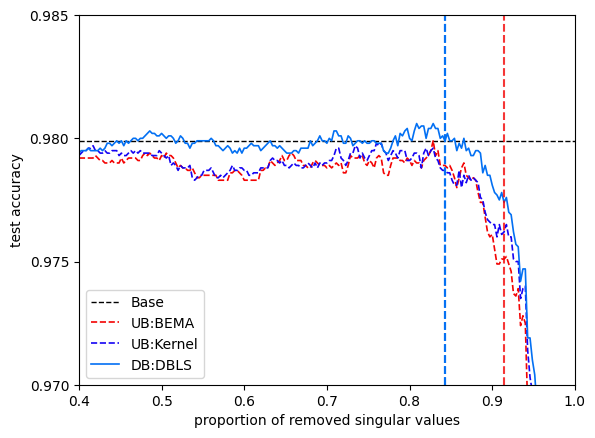

In [40]:
data_name='mnist'
model_name='MLP'
noise=0.0

number=[512,512,350]
model=neural.NNModel(path=f'./model/mnist_0noise/model_{model_name}_{data_name}_noise{float(noise)}',datasets=neural.get_mnist_fc_std(0),batch_size=128)
acc=model.evaluate('test')[1]
layer_index=[0,1,2]
where=scipy.io.loadmat(f'./model/mnist_0noise/parameters_{model_name}_{data_name}_noise{float(noise)}/where_zero.mat')
layer=2
data_BEMA=pd.read_excel(f'./model/mnist_0noise/shift_r_{model_name}_noise{noise}_BEMA_layer{layer_index[layer]}.xlsx')
data_Kernel=pd.read_excel(f'./model/mnist_0noise/shift_r_{model_name}_noise{noise}_Kernel_layer{layer_index[layer]}.xlsx')
data_ourmethod=pd.read_excel(f'./model/mnist_0noise/shift_r_{model_name}_noise{noise}_our_method_layer{layer_index[layer]}.xlsx')
bema=scipy.io.loadmat(f'./model/mnist_0noise/parameters_{model_name}_{data_name}_noise{float(noise)}/BEMA_where.mat')[f'noise{noise}'].ravel()

fig,ax=plt.subplots()
ax.axhline(y=acc,ls='--',color='black',lw=1,label='Base')
ax.plot(data_BEMA[f'noise{noise}_layer{layer_index[layer]}_ratio'],data_BEMA[f'noise{noise}_layer{layer_index[layer]}_accuracies'],label='UB:BEMA',lw=1.2,color='#F30303',ls='--')
ax.plot(data_Kernel[f'noise{noise}_layer{layer_index[layer]}_ratio'],data_Kernel[f'noise{noise}_layer{layer_index[layer]}_accuracies'],label='UB:Kernel',lw=1.2,color='#1503F3',ls='--')
ax.plot(data_ourmethod[f'noise{noise}_layer{layer_index[layer]}_ratio'],data_ourmethod[f'noise{noise}_layer{layer_index[layer]}_accuracies'],label='DB:DBLS',color='#0370F3',lw=1.2)
ax.axvline(1-bema[layer]/number[layer],color='#F30303',ls='--',alpha=0.8)

ax.legend(loc='lower left')
zero=where[f'noise{noise}'][layer]
         
if len(zero)==4:
    for i in range(3):
        ax.axvline(1-zero[2]/number[layer],color='#0370F3',ls='--',alpha=0.8) 
else:
    ax.axvline(1-zero[0]/number[layer],color='black',ls='--',alpha=0.8)   

ax.set_xlim(0.4,1.0)
ax.set_ylim(0.97,0.985)
plt.yticks(np.arange(0.97,0.985,0.005))
plt.ylabel('test accuracy')
plt.xlabel('proportion of removed singular values')

The fitting plot of FCNN on MNIST

6.054423776839894
4.540724288929095


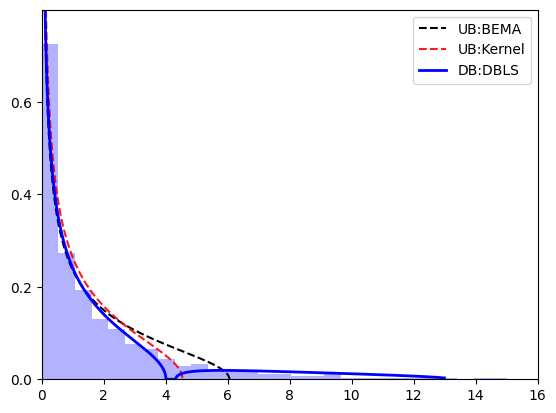

In [42]:
x=np.arange(0,13,0.01)
i=1
data_name='mnist'
model_name='MLP'
noise=0.0
for noise in [0.0]:
    plt.figure()
    f=pd.read_csv(f'./model/mnist_0noise/mnist_matrix2_noise0.csv',index_col=0)
    parameter_BEMA=scipy.io.loadmat(f'./model/mnist_0noise/parameters_{model_name}_{data_name}_noise{noise}/BEMA_sigma_sq.mat')
    parameter_Kernel=scipy.io.loadmat(f'./model/mnist_0noise/parameters_{model_name}_{data_name}_noise{noise}/Kernel_sigma_sq.mat')
    NN_1024 = neural.NNModel(path=f'./model/mnist_0noise/model_{model_name}_{data_name}_noise{float(noise)}',
                                    datasets=neural.get_mnist_fc_std(noise), batch_size=256)
    svd=np.linalg.svd(NN_1024.get_weight(layer_index=i), full_matrices=False)
    tzz_value=svd[1]**2
    p=NN_1024.get_weight(layer_index=i).shape[1]
    N=NN_1024.get_weight(layer_index=i).shape[0]
    C=np.array(p)/np.array(N)

    y_BEMA=MPf(x,parameter_BEMA[f'noise{noise}'].ravel()[i],C)
    y_BEMA_non=np.nonzero(y_BEMA)[0][-1]+2
    plt.plot(x[:y_BEMA_non],y_BEMA[:y_BEMA_non],color='black',ls='--',label='UB:BEMA')

    y_Kernel=MPf(x,parameter_Kernel[f'noise{noise}'].ravel()[i],C)
    y_Kernel_non=np.nonzero(y_Kernel)[0][-1]+2
    plt.plot(x[:y_Kernel_non],y_Kernel[:y_Kernel_non],color='red',ls='--',label='UB:Kernel',alpha=0.9)

    y_our=f.iloc[0,:].values
    y_our_non=np.nonzero(y_our)[0][-1]+1
    plt.plot(x[:y_our_non],y_our[:y_our_non],color='blue',lw=2,label='DB:DBLS')

    plt.hist(tzz_value,bins=300,density=True,color='blue',alpha=0.3)
    plt.xlim(0,16)
    plt.ylim(0,0.8)
    plt.yticks(np.arange(0,0.8,0.2))
    plt.legend()

FCNN on MNIST (60% noise)

79/79 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - sparse_categorical_accuracy: 0.5457 - sparse_categorical_crossentropy: 1.8750 - mean_squared_error: 27.2995


Text(0.5, 0, 'proportion of removed singual values')

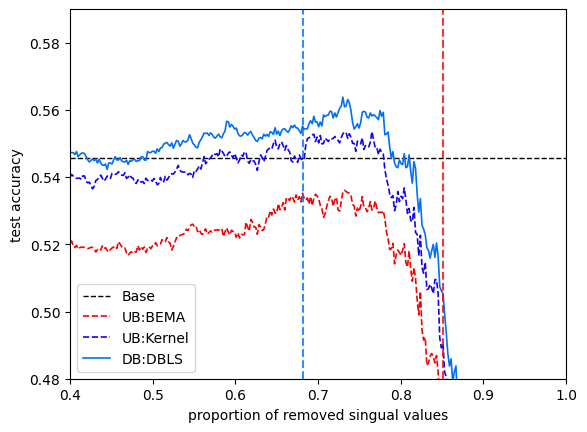

In [43]:
data_name='mnist'
model_name='MLP'
noise=0.6

number=[512,512,350]
model=neural.NNModel(path=f'./model/mnist_0.6noise/model_{model_name}_{data_name}_noise{float(noise)}',datasets=neural.get_mnist_fc_std(0),batch_size=128)
acc=model.evaluate('test')[1]
layer_index=[0,1,2]
where=scipy.io.loadmat(f'./model/mnist_0.6noise/parameters_{model_name}_{data_name}_noise{float(noise)}/where_zero.mat')
layer=0
data_BEMA=pd.read_excel(f'./model/mnist_0.6noise/shift_remove_result_mnist/shift_r_{model_name}_noise{noise}_BEMA_layer{layer_index[layer]}.xlsx')
data_Kernel=pd.read_excel(f'./model/mnist_0.6noise/shift_remove_result_mnist/shift_r_{model_name}_noise{noise}_Kernel_layer{layer_index[layer]}.xlsx')
data_ourmethod=pd.read_excel(f'./model/mnist_0.6noise/shift_remove_result_mnist/shift_r_{model_name}_noise{noise}_our_method_layer{layer_index[layer]}.xlsx')
bema=scipy.io.loadmat(f'./model/mnist_0.6noise/parameters_{model_name}_{data_name}_noise{float(noise)}/BEMA_where.mat')[f'noise{noise}'].ravel()


fig,ax=plt.subplots()
ax.axhline(y=acc,ls='--',color='black',lw=1,label='Base')
ax.plot(data_BEMA[f'noise{noise}_layer{layer_index[layer]}_ratio'],data_BEMA[f'noise{noise}_layer{layer_index[layer]}_accuracies'],label='UB:BEMA',lw=1.2,color='#F30303',ls='--')
ax.plot(data_Kernel[f'noise{noise}_layer{layer_index[layer]}_ratio'],data_Kernel[f'noise{noise}_layer{layer_index[layer]}_accuracies'],label='UB:Kernel',lw=1.2,color='#1503F3',ls='--')
ax.plot(data_ourmethod[f'noise{noise}_layer{layer_index[layer]}_ratio'],data_ourmethod[f'noise{noise}_layer{layer_index[layer]}_accuracies'],label='DB:DBLS',color='#0370F3',lw=1.2)
ax.axvline(1-bema[layer]/number[layer],color='#F30303',ls='--',alpha=0.8)

ax.legend(loc='lower left')
zero=where[f'noise{noise}'][layer]

    
if len(zero)==4:
    ax.axvline(1-zero[2]/number[layer],color='#0370F3',ls='--',alpha=0.8) 
else:
    ax.axvline(1-zero[0]/number[layer],color='#0370F3',ls='--',alpha=0.8)   

ax.set_xlim(0.4,1.0)
ax.set_ylim(0.48,0.59)

plt.ylabel('test accuracy')
plt.xlabel('proportion of removed singual values')


VGG on CIFAR10 (0%noise)

313/313 [==============================] - 1s 4ms/step - loss: 1.0848 - accuracy: 0.8418


Text(0, 0.5, 'test accuracy')

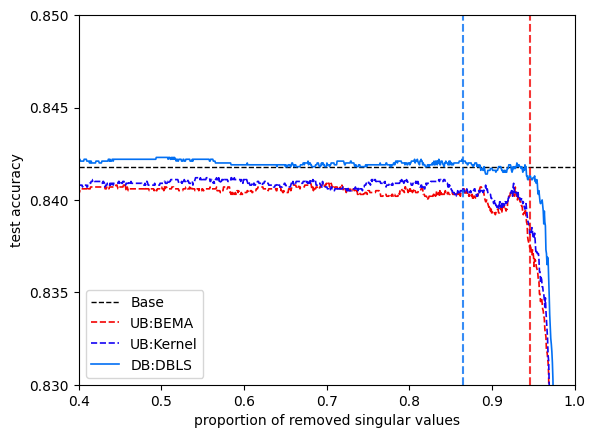

In [44]:
data_name='cifar10'
model_name='vgg16'
noise=0.0
(train_images, train_labels), (test_images,test_labels) = tf.keras.datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
model=tf.keras.models.load_model(f'./model/vgg_0noise/model_{model_name}_noise{noise}')
acc=model.evaluate(test_images,test_labels)[1]
layer_index=[12,16,20,23,27,31,34,45]
number=[384,384,768,768,768,1536,1536,1536]
where=scipy.io.loadmat(f'./model/vgg_0noise/parameters_{model_name}_noise{noise}/where_zero.mat')
layer=7
data_BEMA=pd.read_excel(f'./model/vgg_0noise/shift_r_{model_name}_BEMA_noise{noise}_{layer_index[layer]}.xlsx')
data_Kernel=pd.read_excel(f'./model/vgg_0noise/shift_r_{model_name}_Kernel__noise{noise}_{layer_index[layer]}.xlsx')
data_ourmethod=pd.read_excel(f'./model/vgg_0noise/shift_r_{model_name}_noise{noise}_our_method_layer{layer_index[layer]}.xlsx')
bema=scipy.io.loadmat(f'./model/vgg_0noise/parameters_{model_name}_noise{noise}/BEMA_where.mat')[f'noise{noise}'].ravel()

fig,ax=plt.subplots()
ax.axhline(y=acc,ls='--',color='black',lw=1,label='Base')
ax.plot(data_BEMA[f'noise{noise}_layer{layer_index[layer]}_ratio'],data_BEMA[f'noise{noise}_layer{layer_index[layer]}_accuracies'],label='UB:BEMA',lw=1.2,color='#F30303',ls='--')
ax.plot(data_Kernel[f'noise{noise}_layer{layer_index[layer]}_ratio'],data_Kernel[f'noise{noise}_layer{layer_index[layer]}_accuracies'],label='UB:Kernel',lw=1.2,color='#1503F3',ls='--')
ax.plot(data_ourmethod[f'noise{noise}_layer{layer_index[layer]}_ratio'],data_ourmethod[f'noise{noise}_layer{layer_index[layer]}_accuracies'],label='DB:DBLS',color='#0370F3',lw=1.2)
ax.axvline(1-bema/number[layer],color='#F30303',ls='--',alpha=0.8) 

ax.legend(loc='lower left')
zero=where[f'noise{noise}'][0].ravel()[2].ravel()
        
if len(zero)==4:
    ax.axvline(1-zero[2]/number[layer],color='#0370F3',ls='--',alpha=0.8) 

else:
    ax.axvline(1-zero[0]/number[layer],color='black',ls='--',alpha=0.8)   

ax.set_xlim(0.4,1.0)

ax.set_ylim(0.83,0.85)
plt.yticks(np.arange(0.83,0.851,0.005))
plt.xlabel('proportion of removed singular values')
plt.ylabel('test accuracy')

VGG16 on CIFAR10 (60% noise)

313/313 [==============================] - 1s 4ms/step - loss: 2.0556 - accuracy: 0.4299


Text(0, 0.5, 'test accuracy')

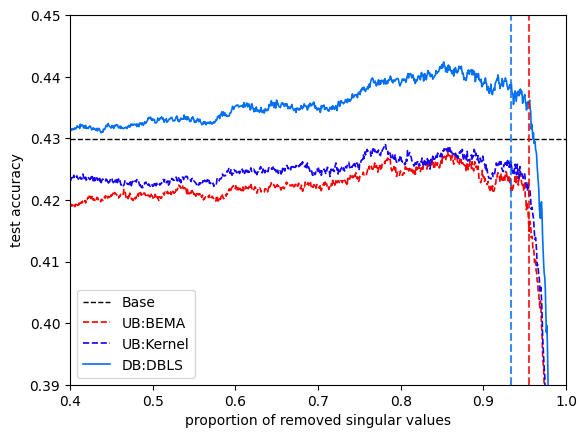

In [45]:
data_name='cifar10'
model_name='vgg16'
noise=0.6
(train_images, train_labels), (test_images,test_labels) = tf.keras.datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
model=tf.keras.models.load_model(f'./model/vgg_0.6noise/model_{model_name}_noise{noise}')
acc=model.evaluate(test_images,test_labels)[1]
layer_index=[38,42,45]
number=[1536,1536,1536]
where=scipy.io.loadmat(f'./model/vgg_0.6noise/parameters_{model_name}_noise{noise}/where_zero.mat')
layer=0
data_BEMA=pd.read_excel(f'./model/vgg_0.6noise/shift_r_{model_name}_BEMA_noise{noise}_{layer_index[layer]}.xlsx')
data_Kernel=pd.read_excel(f'./model/vgg_0.6noise/shift_r_{model_name}_Kernel__noise{noise}_{layer_index[layer]}.xlsx')
data_ourmethod=pd.read_excel(f'./model/vgg_0.6noise/shift_r_{model_name}_noise{noise}_our_method_layer{layer_index[layer]}.xlsx')
bema=scipy.io.loadmat(f'./model/vgg_0.6noise/parameters_{model_name}_noise{noise}/BEMA_where.mat')[f'noise{noise}'].ravel()
fig,ax=plt.subplots()
ax.axhline(y=acc,ls='--',color='black',lw=1,label='Base')
ax.plot(data_BEMA[f'noise{noise}_layer{layer_index[layer]}_ratio'],data_BEMA[f'noise{noise}_layer{layer_index[layer]}_accuracies'],label='UB:BEMA',lw=1.2,color='#F30303',ls='--')
ax.plot(data_Kernel[f'noise{noise}_layer{layer_index[layer]}_ratio'],data_Kernel[f'noise{noise}_layer{layer_index[layer]}_accuracies'],label='UB:Kernel',lw=1.2,color='#1503F3',ls='--')
ax.plot(data_ourmethod[f'noise{noise}_layer{layer_index[layer]}_ratio'],data_ourmethod[f'noise{noise}_layer{layer_index[layer]}_accuracies'],label='DB:DBLS',color='#0370F3',lw=1.2)
ax.axvline(1-bema[layer]/number[layer],color='#F30303',ls='--',alpha=0.8) 

ax.legend(loc='lower left')

zero=where[f'noise{noise}'][layer]
        
if len(zero)==4:
    ax.axvline(1-zero[2]/number[layer],color='#0370F3',ls='--',alpha=0.8) 

else:
    ax.axvline(1-zero[0]/number[layer],color='black',ls='--',alpha=0.8)   

ax.set_xlim(0.4,1.0)
ax.set_ylim(0.39,0.45)
plt.xlabel('proportion of removed singular values')
plt.ylabel('test accuracy')

Resnet18 on Cifar10 (0% noise)

313/313 [==============================] - 1s 4ms/step - loss: 1.2330 - accuracy: 0.8348


Text(0, 0.5, 'test accuracy')

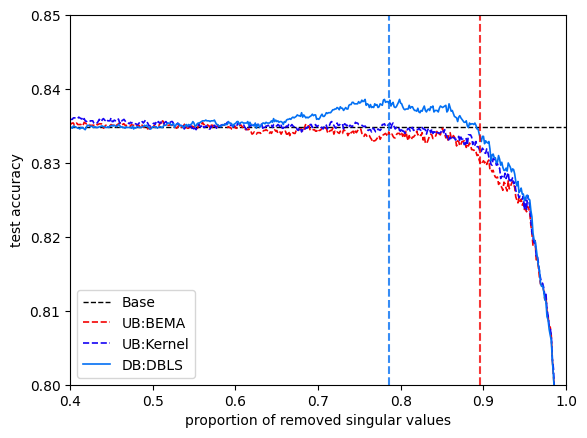

In [46]:
data_name='cifar10'
model_name='resnet'
noise=0.0
(train_images, train_labels), (test_images,test_labels) = tf.keras.datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
model=tf.keras.models.load_model(f'./model/resnet_0noise/model_{model_name}_noise{noise}')
acc=model.evaluate(test_images,test_labels)[1]
layer_index=[18,21,27,30,34,43,46,50]
number=[192,384,384,384,384,768,768,768]
where=scipy.io.loadmat(f'./model/resnet_0noise/parameters_{model_name}_noise{noise}/where_zero.mat')
layer=6
data_BEMA=pd.read_excel(f'./model/resnet_0noise/shift_r_{model_name}_BEMA_noise{noise}_{layer_index[layer]}.xlsx')
data_Kernel=pd.read_excel(f'./model/resnet_0noise/shift_r_{model_name}_Kernel__noise{noise}_{layer_index[layer]}.xlsx')
data_ourmethod=pd.read_excel(f'./model/resnet_0noise/shift_r_{model_name}_noise{noise}_our_method_layer{layer_index[layer]}.xlsx')
bema=scipy.io.loadmat(f'./model/resnet_0noise/parameters_{model_name}_noise{noise}/BEMA_where.mat')[f'noise{noise}'].ravel()

fig,ax=plt.subplots()
ax.axhline(y=acc,ls='--',color='black',lw=1,label='Base')
ax.plot(data_BEMA[f'noise{noise}_layer{layer_index[layer]}_ratio'],data_BEMA[f'noise{noise}_layer{layer_index[layer]}_accuracies'],label='UB:BEMA',lw=1.2,color='#F30303',ls='--')
ax.plot(data_Kernel[f'noise{noise}_layer{layer_index[layer]}_ratio'],data_Kernel[f'noise{noise}_layer{layer_index[layer]}_accuracies'],label='UB:Kernel',lw=1.2,color='#1503F3',ls='--')
ax.plot(data_ourmethod[f'noise{noise}_layer{layer_index[layer]}_ratio'],data_ourmethod[f'noise{noise}_layer{layer_index[layer]}_accuracies'],label='DB:DBLS',color='#0370F3',lw=1.2)
ax.axvline(1-bema/number[layer],color='#F30303',ls='--',alpha=0.8)

ax.legend(loc='lower left')
zero=where[f'noise{noise}'][layer]
        
if len(zero)==4:
    ax.axvline(1-zero[2]/number[layer],color='#0370F3',ls='--',alpha=0.8) 

else:
    ax.axvline(1-zero[0]/number[layer],color='black',ls='--',alpha=0.8)   

ax.set_xlim(0.4,1.0)

ax.set_ylim(0.80,0.85)
plt.xlabel('proportion of removed singular values')
plt.ylabel('test accuracy')


ResNet18 on Cifar10 (60% noise)

313/313 [==============================] - 2s 4ms/step - loss: 3.7819 - accuracy: 0.2963


Text(0, 0.5, 'test accuracy')

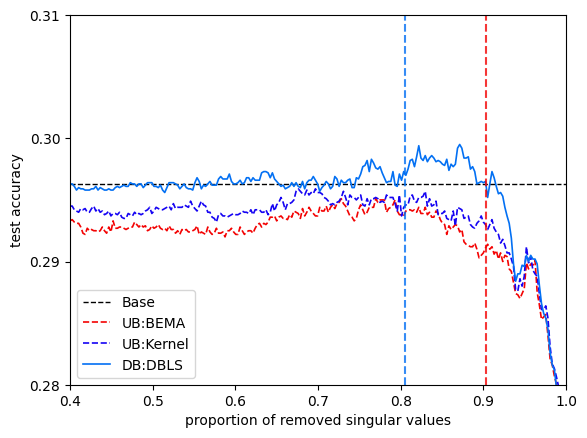

In [47]:
data_name='cifar10'
model_name='resnet2'
noise=0.6
(train_images, train_labels), (test_images,test_labels) = tf.keras.datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
model=tf.keras.models.load_model(f'./model/resnet_0.6noise/model_{model_name}_noise{noise}')
acc=model.evaluate(test_images,test_labels)[1]
layer_index=[18,21,27,59]
number=[192,384,384,1536]
where=scipy.io.loadmat(f'./model/resnet_0.6noise/parameters_{model_name}_noise{noise}/where_zero.mat')
layer=2
data_BEMA=pd.read_excel(f'./model/resnet_0.6noise/shift_r_{model_name}_BEMA_noise{noise}_{layer_index[layer]}.xlsx')
data_Kernel=pd.read_excel(f'./model/resnet_0.6noise/shift_r_{model_name}_Kernel__noise{noise}_{layer_index[layer]}.xlsx')
data_ourmethod=pd.read_excel(f'./model/resnet_0.6noise/shift_r_{model_name}_noise{noise}_our_method_layer{layer_index[layer]}.xlsx')
bema=scipy.io.loadmat(f'./model/resnet_0.6noise/parameters_{model_name}_noise{noise}/BEMA_where.mat')[f'noise{noise}'].ravel()

fig,ax=plt.subplots()
ax.axhline(y=acc,ls='--',color='black',lw=1,label='Base')
ax.plot(data_BEMA[f'noise{noise}_layer{layer_index[layer]}_ratio'],data_BEMA[f'noise{noise}_layer{layer_index[layer]}_accuracies'],label='UB:BEMA',lw=1.2,color='#F30303',ls='--')
ax.plot(data_Kernel[f'noise{noise}_layer{layer_index[layer]}_ratio'],data_Kernel[f'noise{noise}_layer{layer_index[layer]}_accuracies'],label='UB:Kernel',lw=1.2,color='#1503F3',ls='--')
ax.plot(data_ourmethod[f'noise{noise}_layer{layer_index[layer]}_ratio'],data_ourmethod[f'noise{noise}_layer{layer_index[layer]}_accuracies'],label='DB:DBLS',color='#0370F3',lw=1.2)
ax.axvline(1-bema[layer]/number[layer],color='#F30303',ls='--',alpha=0.8)

ax.legend(loc='lower left')
zero=where[f'noise{noise}'][layer]
        
if len(zero)==4:
    ax.axvline(1-zero[2]/number[layer],color='#0370F3',ls='--',alpha=0.8) 

else:
    ax.axvline(1-zero[0]/number[layer],color='black',ls='--',alpha=0.8)   

ax.set_xlim(0.4,1.0)

ax.set_ylim(0.28,0.31)
plt.yticks(np.arange(0.28,0.32,0.01))
plt.xlabel('proportion of removed singular values')
plt.ylabel('test accuracy')
